In [2]:
from sympy import Function, dsolve, Eq, Derivative, symbols, plot, init_printing, cos, sqrt
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
from sympy.solvers.ode.systems import dsolve_system
import scipy
from scipy.integrate import odeint
import math


plt.style.use('ggplot')
init_printing(use_latex=True)

## Sympy solution

In [3]:
k = 1
m = 2

A = 0.1
beta = 0.1
# omega = -np.pi/27
omega = 0.71
omega_zero = math.sqrt(k/m)
# omega_zero = 0.71

# x0 = 0.001
# dx_dt0 = 0.001

# Warunki poczatkowe sa nieistotne
# x0 = 0.001
x0 = 3
dx_dt0 = 0.2

start_time = 0
end_time = 64
dt = 0.01
 
description = "\u03B2 = {}, \u03C9 = {}, A = {}, x(0) = {}, dx_dt(0) = {}, k = {}, m = {}, dt = {}, \u03C9 zero = {}".format(beta, omega, A, x0, dx_dt0, k, m, dt, omega_zero)

In [4]:
t = symbols('t')
x = Function('x')

In [5]:
eq = Eq(x(t).diff(t, 2) + 2*beta*x(t).diff(t) + (omega_zero**2)*x(t), A*cos(omega*t))

In [6]:
harmonic_oscillator_symbolic = dsolve(eq, ics={x(0):x0, x(t).diff(t).subs(t, 0): dx_dt0})

In [7]:
harmonic_oscillator_symbolic

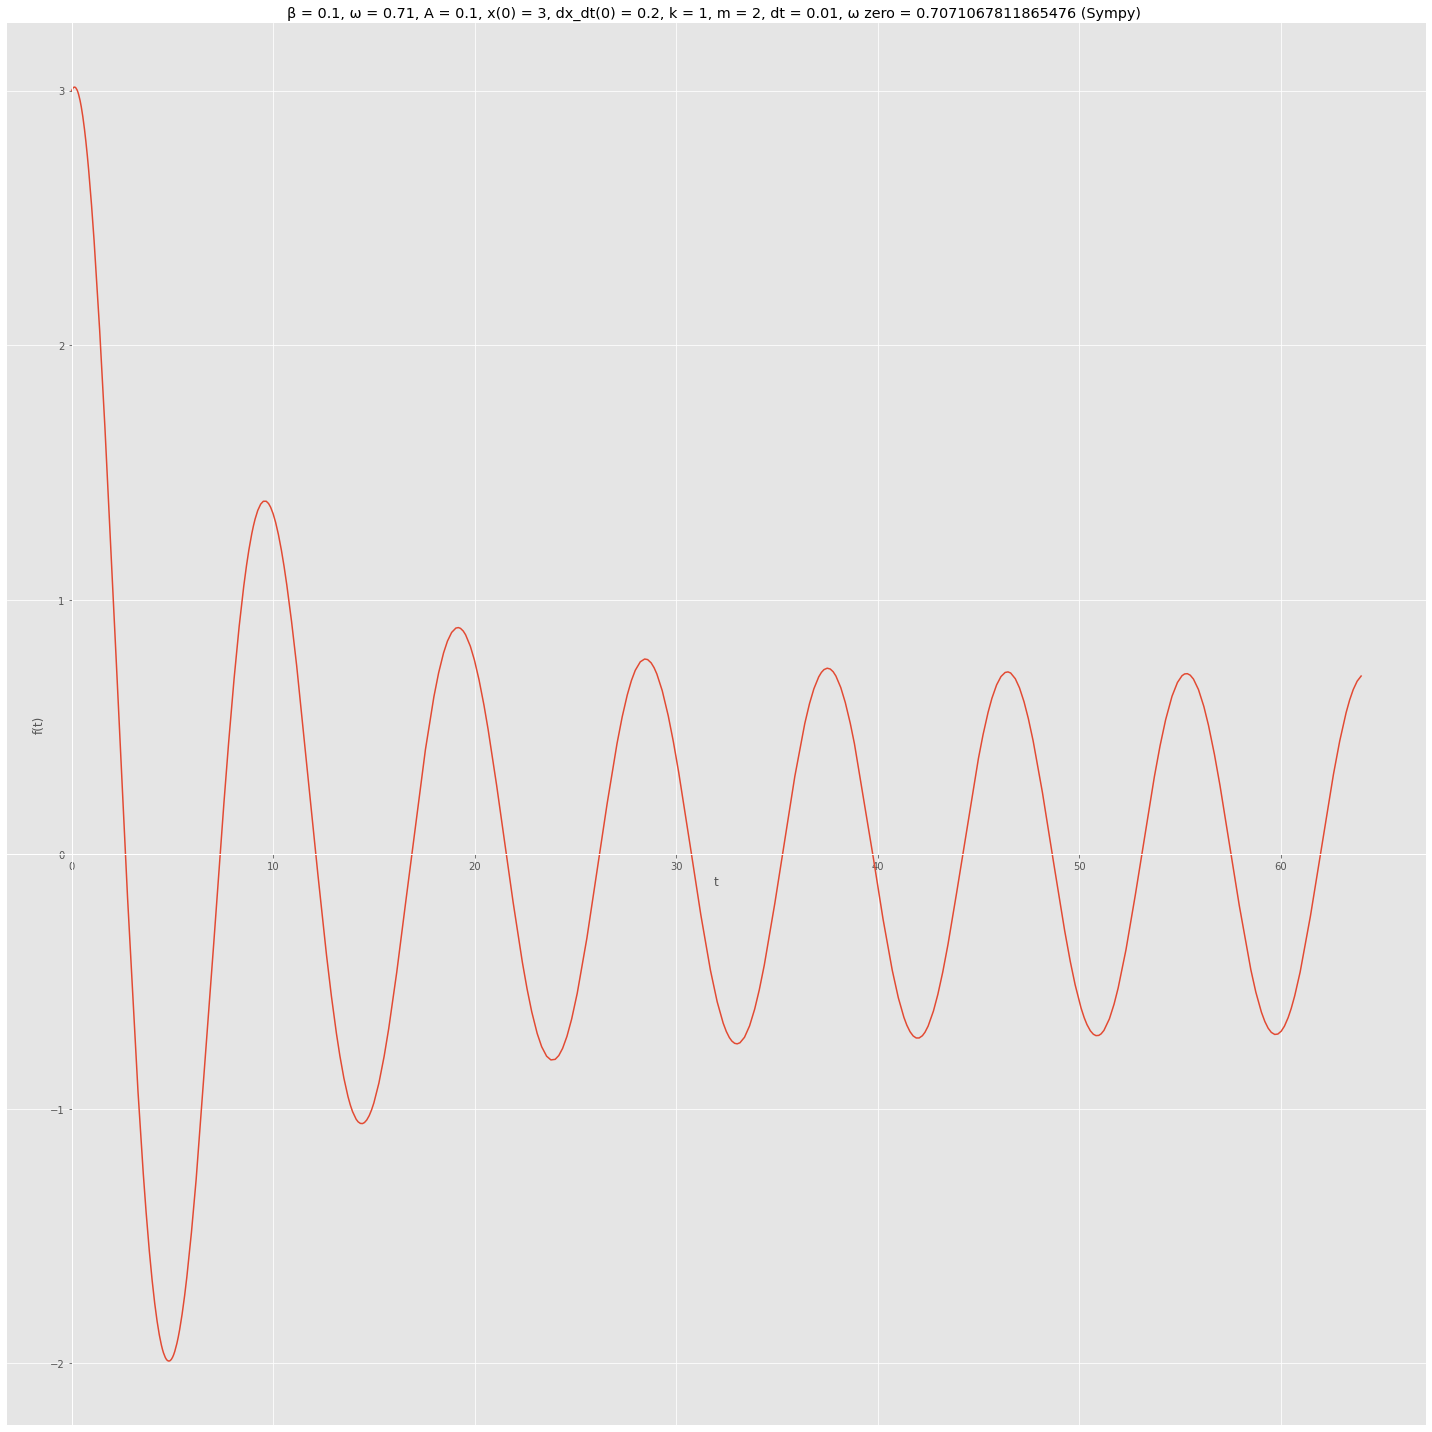

In [8]:
plot(harmonic_oscillator_symbolic.rhs, (t, 0, 64), size=(20, 20), title=description + " (Sympy) ")

## Odeint solution

In [9]:
from math import cos, ceil

def harmonic_oscillator_scipy(xy, t):
    x, y = xy
    return y, A*cos(omega*t) - 2*beta*y - (omega_zero**2)*x

In [10]:
tspan = np.linspace(start_time, end_time, ceil((end_time-start_time)/dt))
warunki = np.asarray([dx_dt0, x0])
X, infodict = odeint(harmonic_oscillator_scipy, warunki, tspan, full_output=True)

(2, 6400)


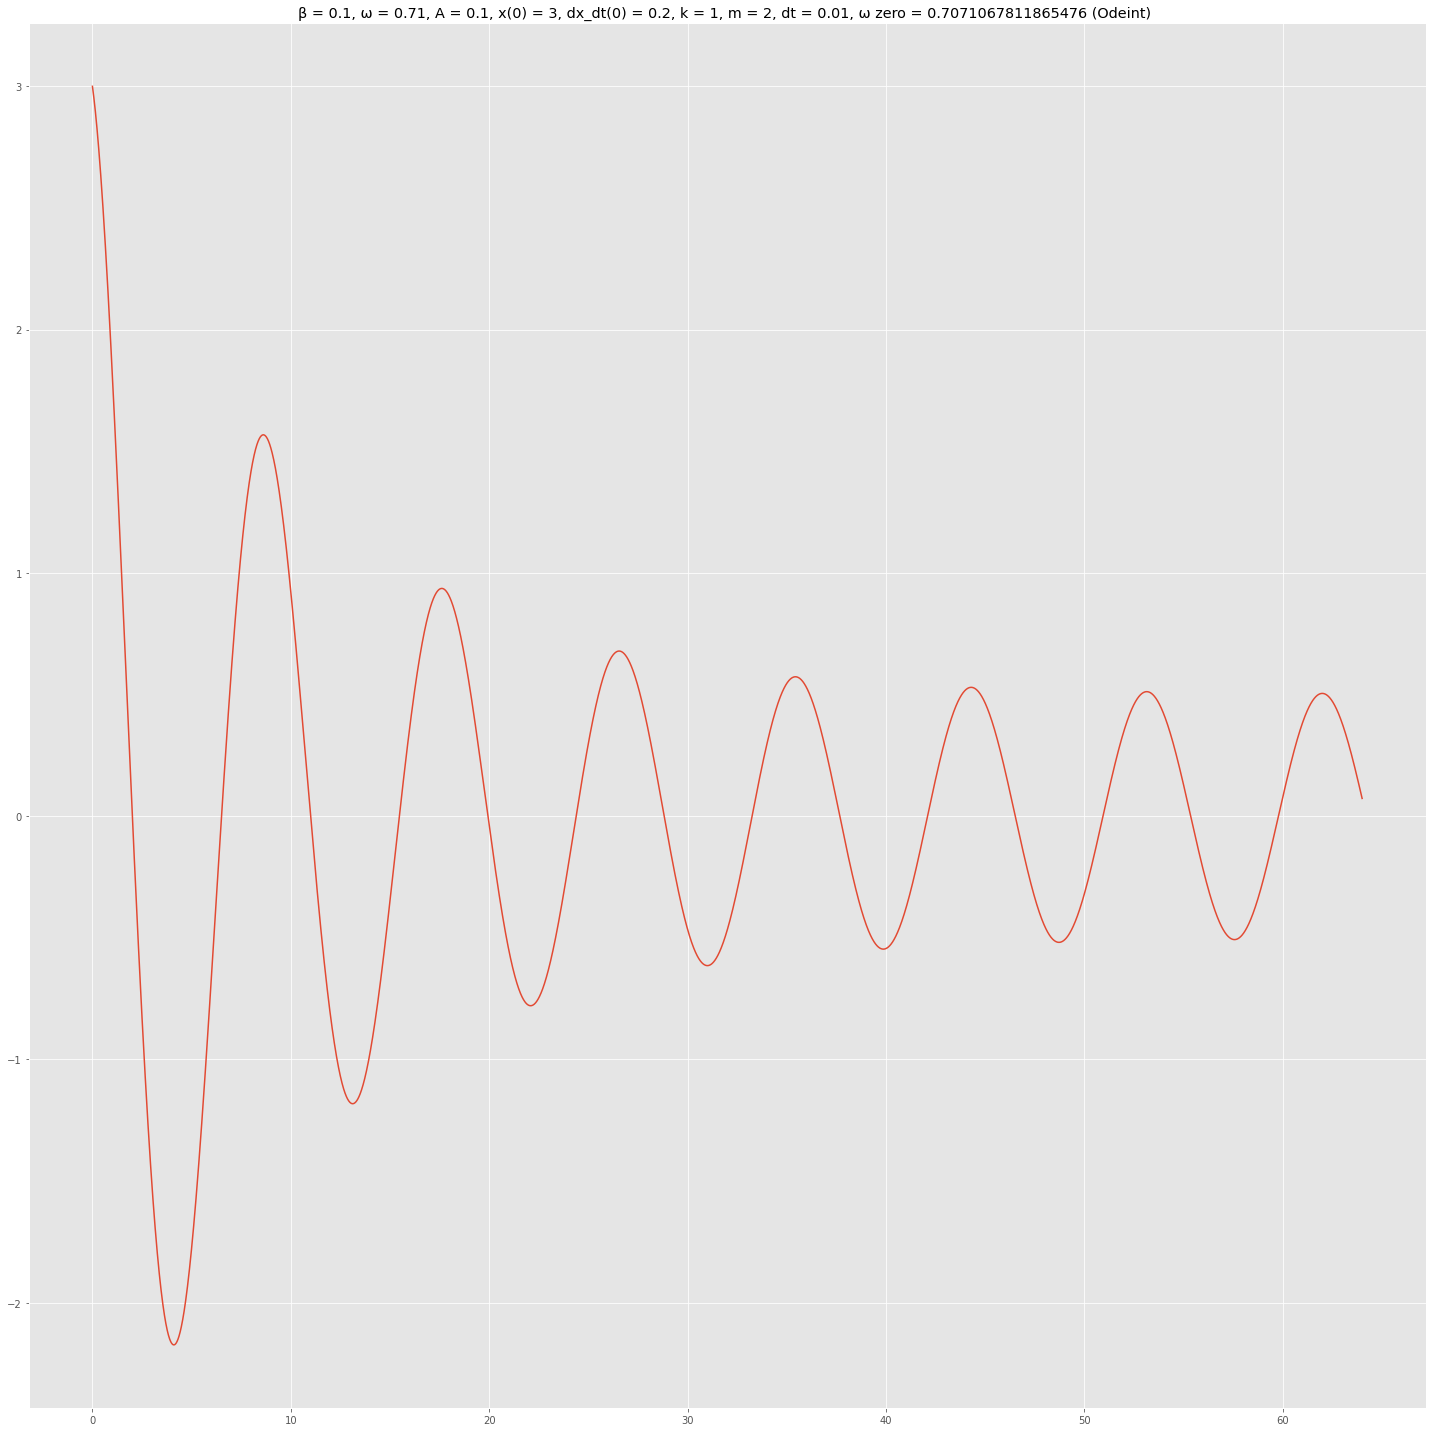

In [11]:
sol_ode = X.T
print(sol_ode.shape)
sol_ode_x, sol_ode_u = sol_ode
fig, ax = plt.subplots(figsize=(20, 20))
ax.plot(tspan, sol_ode_u)
plt.title(description + " (Odeint) ")
fig.tight_layout()

In [12]:
def MSE(Y_true, Y_pred):
    return np.square(np.subtract(Y_true,Y_pred)).mean()

def MAE(Y_true, Y_pred):
    return np.abs(np.subtract(Y_pred, Y_true)).mean()
#     total_sum = 0
#     for i in range(len(Y_pred)):
#         total_sum += abs(Y_pred[i] - Y_true[i])
#     return total_sum/len(Y_pred)

In [13]:
# def sympy_steps_gen():
#     tspan = np.linspace(start_time, end_time, ceil((end_time-start_time)/dt))
# print(dt)
# print(ceil((end_time-start_time)/dt))

def sympy_steps_gen():
#     FIXME: nie dziala
    tspan = np.linspace(start_time, end_time, ceil((end_time-start_time)/dt))
    values = np.zeros(len(tspan))
    for moment in range(len(tspan)):
        values[moment] = harmonic_oscillator_symbolic.rhs.subs(t, tspan[moment])
    return values

temp = sympy_steps_gen()

In [14]:
print(MAE(sol_ode_u, temp))

0.5752325206925316


In [15]:
print(MSE(sol_ode_u, temp))

0.41206384086185893


In [16]:
error = np.subtract(sol_ode_u, temp)

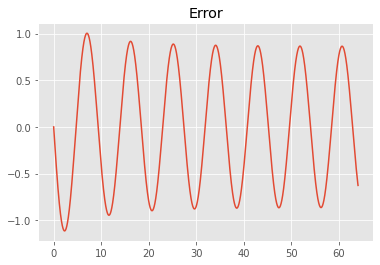

In [17]:
plt.title("Error")
plt.plot(tspan, error)